<a href="https://colab.research.google.com/github/bharathts1507/TSAI-Assignments-EVA4/blob/master/S9_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torchsummary import summary

In [2]:
# mount the drive to access libraries and supportive classes
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.getcwd()
import sys
sys.path.append('/content/drive/My Drive/TSAI_EVA4/S8')

In [0]:
from data_album_aug import get_data_loader
from model import Net
from train import train, eval
from resnet import ResNet18

In [0]:
Net = ResNet18

In [6]:
trainloader, testloader, classes = get_data_loader()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer truck   cat truck truck   cat   cat plane horse plane   dog   dog  deer   car   car  frog   car  frog   dog  ship   cat   car  frog  deer  bird  deer  bird   cat horse   car   cat   cat  ship horse plane plane plane truck plane  frog horse  ship  deer  bird plane   cat   dog  bird truck   dog   cat  deer   dog   dog  frog horse  frog  ship  deer plane truck


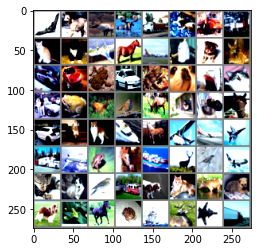

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(len(images))))

In [11]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

EPOCHS = 35
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,train_losses, train_acc)
    eval(model, device, testloader, test_losses, test_acc)

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.0923216342926025 Batch_id=781 Accuracy=54.14: 100%|██████████| 782/782 [01:46<00:00,  6.56it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0052, Accuracy: 6531/10000 (65.31%)

EPOCH: 1


Loss=0.3097875714302063 Batch_id=781 Accuracy=73.57: 100%|██████████| 782/782 [01:47<00:00,  6.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6873, Accuracy: 7650/10000 (76.50%)

EPOCH: 2


Loss=0.6959880590438843 Batch_id=781 Accuracy=79.61: 100%|██████████| 782/782 [01:47<00:00,  6.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6895, Accuracy: 7573/10000 (75.73%)

EPOCH: 3


Loss=0.3036806285381317 Batch_id=781 Accuracy=83.72: 100%|██████████| 782/782 [01:47<00:00,  6.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6134, Accuracy: 7888/10000 (78.88%)

EPOCH: 4


Loss=0.38276413083076477 Batch_id=781 Accuracy=86.58: 100%|██████████| 782/782 [01:47<00:00,  6.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4909, Accuracy: 8356/10000 (83.56%)

EPOCH: 5


Loss=0.34586891531944275 Batch_id=781 Accuracy=88.44: 100%|██████████| 782/782 [01:47<00:00,  6.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4800, Accuracy: 8400/10000 (84.00%)

EPOCH: 6


Loss=0.2989971339702606 Batch_id=781 Accuracy=90.31: 100%|██████████| 782/782 [01:46<00:00,  6.68it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4952, Accuracy: 8409/10000 (84.09%)

EPOCH: 7


Loss=0.20154157280921936 Batch_id=781 Accuracy=91.93: 100%|██████████| 782/782 [01:46<00:00,  6.60it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5227, Accuracy: 8397/10000 (83.97%)

EPOCH: 8


Loss=0.16778934001922607 Batch_id=781 Accuracy=93.12: 100%|██████████| 782/782 [01:46<00:00,  6.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5304, Accuracy: 8448/10000 (84.48%)

EPOCH: 9


Loss=0.08250129222869873 Batch_id=781 Accuracy=94.14: 100%|██████████| 782/782 [01:46<00:00,  6.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5458, Accuracy: 8410/10000 (84.10%)

EPOCH: 10


Loss=0.21224729716777802 Batch_id=781 Accuracy=95.16: 100%|██████████| 782/782 [01:46<00:00,  6.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5304, Accuracy: 8493/10000 (84.93%)

EPOCH: 11


Loss=0.042701661586761475 Batch_id=781 Accuracy=95.87: 100%|██████████| 782/782 [01:48<00:00,  6.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5710, Accuracy: 8426/10000 (84.26%)

EPOCH: 12


Loss=0.22687727212905884 Batch_id=781 Accuracy=96.65: 100%|██████████| 782/782 [01:47<00:00,  6.64it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5191, Accuracy: 8619/10000 (86.19%)

EPOCH: 13


Loss=0.19656029343605042 Batch_id=781 Accuracy=97.06: 100%|██████████| 782/782 [01:47<00:00,  6.05it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6130, Accuracy: 8444/10000 (84.44%)

EPOCH: 14


Loss=0.06068393588066101 Batch_id=781 Accuracy=97.27: 100%|██████████| 782/782 [01:47<00:00,  6.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5905, Accuracy: 8543/10000 (85.43%)

EPOCH: 15


Loss=0.022442281246185303 Batch_id=781 Accuracy=97.78: 100%|██████████| 782/782 [01:48<00:00,  6.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5605, Accuracy: 8607/10000 (86.07%)

EPOCH: 16


Loss=0.6212974786758423 Batch_id=781 Accuracy=98.23: 100%|██████████| 782/782 [01:47<00:00,  6.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5899, Accuracy: 8608/10000 (86.08%)

EPOCH: 17


Loss=0.001953423023223877 Batch_id=781 Accuracy=98.11: 100%|██████████| 782/782 [01:47<00:00,  6.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5825, Accuracy: 8673/10000 (86.73%)

EPOCH: 18


Loss=0.1979176253080368 Batch_id=781 Accuracy=98.50: 100%|██████████| 782/782 [01:47<00:00,  5.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5880, Accuracy: 8657/10000 (86.57%)

EPOCH: 19


Loss=0.0328906774520874 Batch_id=781 Accuracy=98.45: 100%|██████████| 782/782 [01:47<00:00,  6.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5923, Accuracy: 8669/10000 (86.69%)

EPOCH: 20


Loss=0.029789328575134277 Batch_id=781 Accuracy=98.90: 100%|██████████| 782/782 [01:46<00:00,  6.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5678, Accuracy: 8713/10000 (87.13%)

EPOCH: 21


Loss=0.0020257234573364258 Batch_id=781 Accuracy=99.02: 100%|██████████| 782/782 [01:47<00:00,  6.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6159, Accuracy: 8637/10000 (86.37%)

EPOCH: 22


Loss=0.0021551847457885742 Batch_id=781 Accuracy=99.30: 100%|██████████| 782/782 [01:47<00:00,  6.68it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6174, Accuracy: 8692/10000 (86.92%)

EPOCH: 23


Loss=0.00042188167572021484 Batch_id=781 Accuracy=99.31: 100%|██████████| 782/782 [01:47<00:00,  6.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6281, Accuracy: 8690/10000 (86.90%)

EPOCH: 24


Loss=0.028876662254333496 Batch_id=781 Accuracy=99.46: 100%|██████████| 782/782 [01:47<00:00,  6.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6347, Accuracy: 8720/10000 (87.20%)

EPOCH: 25


Loss=0.15106576681137085 Batch_id=781 Accuracy=99.40: 100%|██████████| 782/782 [01:47<00:00,  6.68it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6355, Accuracy: 8725/10000 (87.25%)

EPOCH: 26


Loss=0.19481396675109863 Batch_id=781 Accuracy=99.16: 100%|██████████| 782/782 [01:47<00:00,  6.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7065, Accuracy: 8624/10000 (86.24%)

EPOCH: 27


Loss=0.005487263202667236 Batch_id=781 Accuracy=99.25: 100%|██████████| 782/782 [01:48<00:00,  6.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6727, Accuracy: 8648/10000 (86.48%)

EPOCH: 28


Loss=0.004328012466430664 Batch_id=781 Accuracy=99.45: 100%|██████████| 782/782 [01:47<00:00,  6.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6407, Accuracy: 8725/10000 (87.25%)

EPOCH: 29


Loss=0.00015586614608764648 Batch_id=781 Accuracy=99.56: 100%|██████████| 782/782 [01:47<00:00,  6.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6624, Accuracy: 8765/10000 (87.65%)

EPOCH: 30


Loss=0.2057773470878601 Batch_id=781 Accuracy=99.70: 100%|██████████| 782/782 [01:48<00:00,  6.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6847, Accuracy: 8722/10000 (87.22%)

EPOCH: 31


Loss=0.0621953010559082 Batch_id=781 Accuracy=99.39: 100%|██████████| 782/782 [01:50<00:00,  5.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6663, Accuracy: 8752/10000 (87.52%)

EPOCH: 32


Loss=0.013754993677139282 Batch_id=781 Accuracy=99.47: 100%|██████████| 782/782 [01:48<00:00,  6.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7010, Accuracy: 8685/10000 (86.85%)

EPOCH: 33


Loss=0.0003858804702758789 Batch_id=781 Accuracy=99.64: 100%|██████████| 782/782 [01:49<00:00,  6.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6488, Accuracy: 8739/10000 (87.39%)

EPOCH: 34


Loss=0.0014473795890808105 Batch_id=781 Accuracy=99.76: 100%|██████████| 782/782 [01:52<00:00,  6.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6861, Accuracy: 8755/10000 (87.55%)

EPOCH: 35


Loss=0.006628811359405518 Batch_id=781 Accuracy=99.81: 100%|██████████| 782/782 [01:47<00:00,  6.53it/s]


In [0]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")